In [39]:
#

✅ Cleaned column names:
 ['date', 'croptype', 'soiltype', 'soilph', 'temperature', 'humidity', 'windspeed', 'n', 'p', 'k', 'cropyield', 'soilquality']

Shape of dataset: (36520, 12)

Missing values:
 date           0
croptype       0
soiltype       0
soilph         0
temperature    0
humidity       0
windspeed      0
n              0
p              0
k              0
cropyield      0
soilquality    0
dtype: int64

✅ Removed rows where cropyield = 0
Remaining rows: 25495


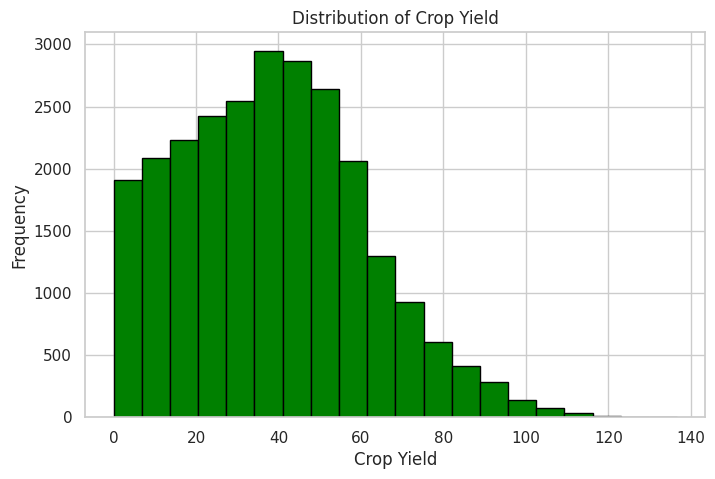

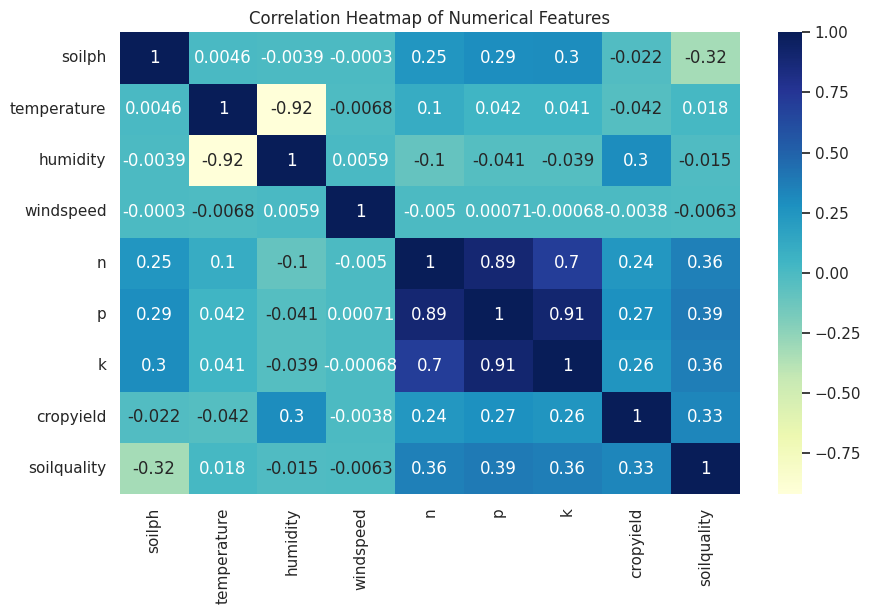


Categorical Columns: ['date', 'croptype', 'soiltype']
Numerical Columns: ['soilph', 'temperature', 'humidity', 'windspeed', 'n', 'p', 'k', 'cropyield', 'soilquality']

OneHotEncoded shape: (25495, 3639)

LabelEncoded Data Sample:
   date  croptype  soiltype  soilph  temperature   humidity  windspeed     n  \
1     0         1         1    6.50    20.052576  79.947424   8.591577  84.0   
3     0         0         4    6.75    19.751848  80.000000   2.682683  50.0   
4     0         5         2    5.50    16.110395  80.000000   7.696070  49.5   
5     0         2         4    6.75    14.826739  80.000000  10.366657  55.0   
7     0         8         0    6.25    18.323272  80.000000   8.198084  60.0   

      p     k   cropyield  soilquality  
1  66.0  50.0  104.871310    66.666667  
3  40.0  30.0   58.939796    35.000000  
4  45.0  38.5   32.970413    22.166667  
5  44.0  36.0   29.356115    39.375000  
7  45.0  40.0   22.221375    42.291667  

OrdinalEncoded shape: (25495, 3)
standard

In [40]:
# ===============================================================
# 🌾 Crop Yield Data Analysis, Visualization & Preprocessing
# ===============================================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Step 2: Load Dataset
# ⚠️ Change file name if it’s different in your Kaggle input folder
data = pd.read_csv("/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv")

# Step 3: Clean Column Names (all lowercase + remove spaces/underscores)
data.columns = [col.lower().replace(" ", "").replace("_", "") for col in data.columns]
print("✅ Cleaned column names:\n", list(data.columns))

# Step 4: Explore Basic Info
print("\nShape of dataset:", data.shape)
print("\nMissing values:\n", data.isnull().sum())

# Step 5: Remove rows where yield is 0
yield_col = None
for possible in ['cropyield', 'yield', 'crop_production', 'yieldtonnes']:
    if possible in data.columns:
        yield_col = possible
        break

if yield_col:
    data = data[data[yield_col] != 0]
    print(f"\n✅ Removed rows where {yield_col} = 0")
else:
    raise ValueError("⚠️ Couldn't find yield column! Please check your dataset column names.")

print("Remaining rows:", len(data))

# ===============================================================
# 📊 Step 6: Visualization using Matplotlib & Seaborn
# ===============================================================

# 1️⃣ Distribution of yield
plt.figure(figsize=(8,5))
plt.hist(data[yield_col], bins=20, color='green', edgecolor='black')
plt.title("Distribution of Crop Yield")
plt.xlabel("Crop Yield")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Average yield by crop type
if 'crop' in data.columns:
    plt.figure(figsize=(10,6))
    data.groupby('crop')[yield_col].mean().sort_values(ascending=False).plot(kind='bar', color='teal')
    plt.title("Average Crop Yield by Crop Type")
    plt.ylabel("Average Yield")
    plt.xticks(rotation=45)
    plt.show()

# 3️⃣ Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 4️⃣ Yield vs Temperature
if 'averagetemperature' in data.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(data['averagetemperature'], data[yield_col], color='orange')
    plt.title("Crop Yield vs Average Temperature")
    plt.xlabel("Average Temperature")
    plt.ylabel("Crop Yield")
    plt.show()

# 5️⃣ Yield vs Rainfall
if 'rainfall' in data.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(data['rainfall'], data[yield_col], color='blue')
    plt.title("Crop Yield vs Rainfall")
    plt.xlabel("Rainfall (mm)")
    plt.ylabel("Crop Yield")
    plt.show()

# 6️⃣ Soil Moisture levels (if available)
if 'soilmoisture' in data.columns and 'crop' in data.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='crop', y='soilmoisture', data=data)
    plt.title("Soil Moisture Levels Across Crops")
    plt.xticks(rotation=45)
    plt.show()

# ===============================================================
# 🧩 Step 7: Identify Categorical & Numerical Columns
# ===============================================================

categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

# ===============================================================
# ⚙️ Step 8: Preprocess Categorical Data
# ===============================================================

# OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(data[categorical_cols])
print("\nOneHotEncoded shape:", onehot_encoded.shape)

# LabelEncoder (column-wise)
label_encoded_data = data.copy()
for col in categorical_cols:
    label_encoded_data[col] = LabelEncoder().fit_transform(label_encoded_data[col].astype(str))
print("\nLabelEncoded Data Sample:")
print(label_encoded_data.head())

# OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(data[categorical_cols])
print("\nOrdinalEncoded shape:", ordinal_encoded.shape)

# ===============================================================
# ⚖️ Step 9: Scale Numerical Data
# ===============================================================

scalers = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler()
}

scaled_datasets = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(data[numerical_cols])
    scaled_datasets[name] = pd.DataFrame(scaled, columns=numerical_cols)
    print(f"{name} scaler applied → shape = {scaled_datasets[name].shape}")

# ===============================================================
# 🔄 Step 10: Combine Encoders + Scalers to Form ML-Ready Datasets
# ===============================================================

encoders = {
    "onehot": onehot_encoder,
    "ordinal": ordinal_encoder
}

combined_datasets = {}
for enc_name, encoder in encoders.items():
    for sc_name, scaler in scalers.items():
        transformer = ColumnTransformer([
            ('encoder', encoder, categorical_cols),
            ('scaler', scaler, numerical_cols)
        ])
        transformed = transformer.fit_transform(data)
        combined_datasets[f"{enc_name}_{sc_name}"] = transformed
        print(f"✅ Created dataset: {enc_name}_{sc_name} | Shape: {transformed.shape}")

# ===============================================================
# ✅ Step 11: Summary
# ===============================================================

print("\n✅ Summary:")
print(f"Total datasets created: {len(combined_datasets)}")
for key in combined_datasets.keys():
    print("-", key)


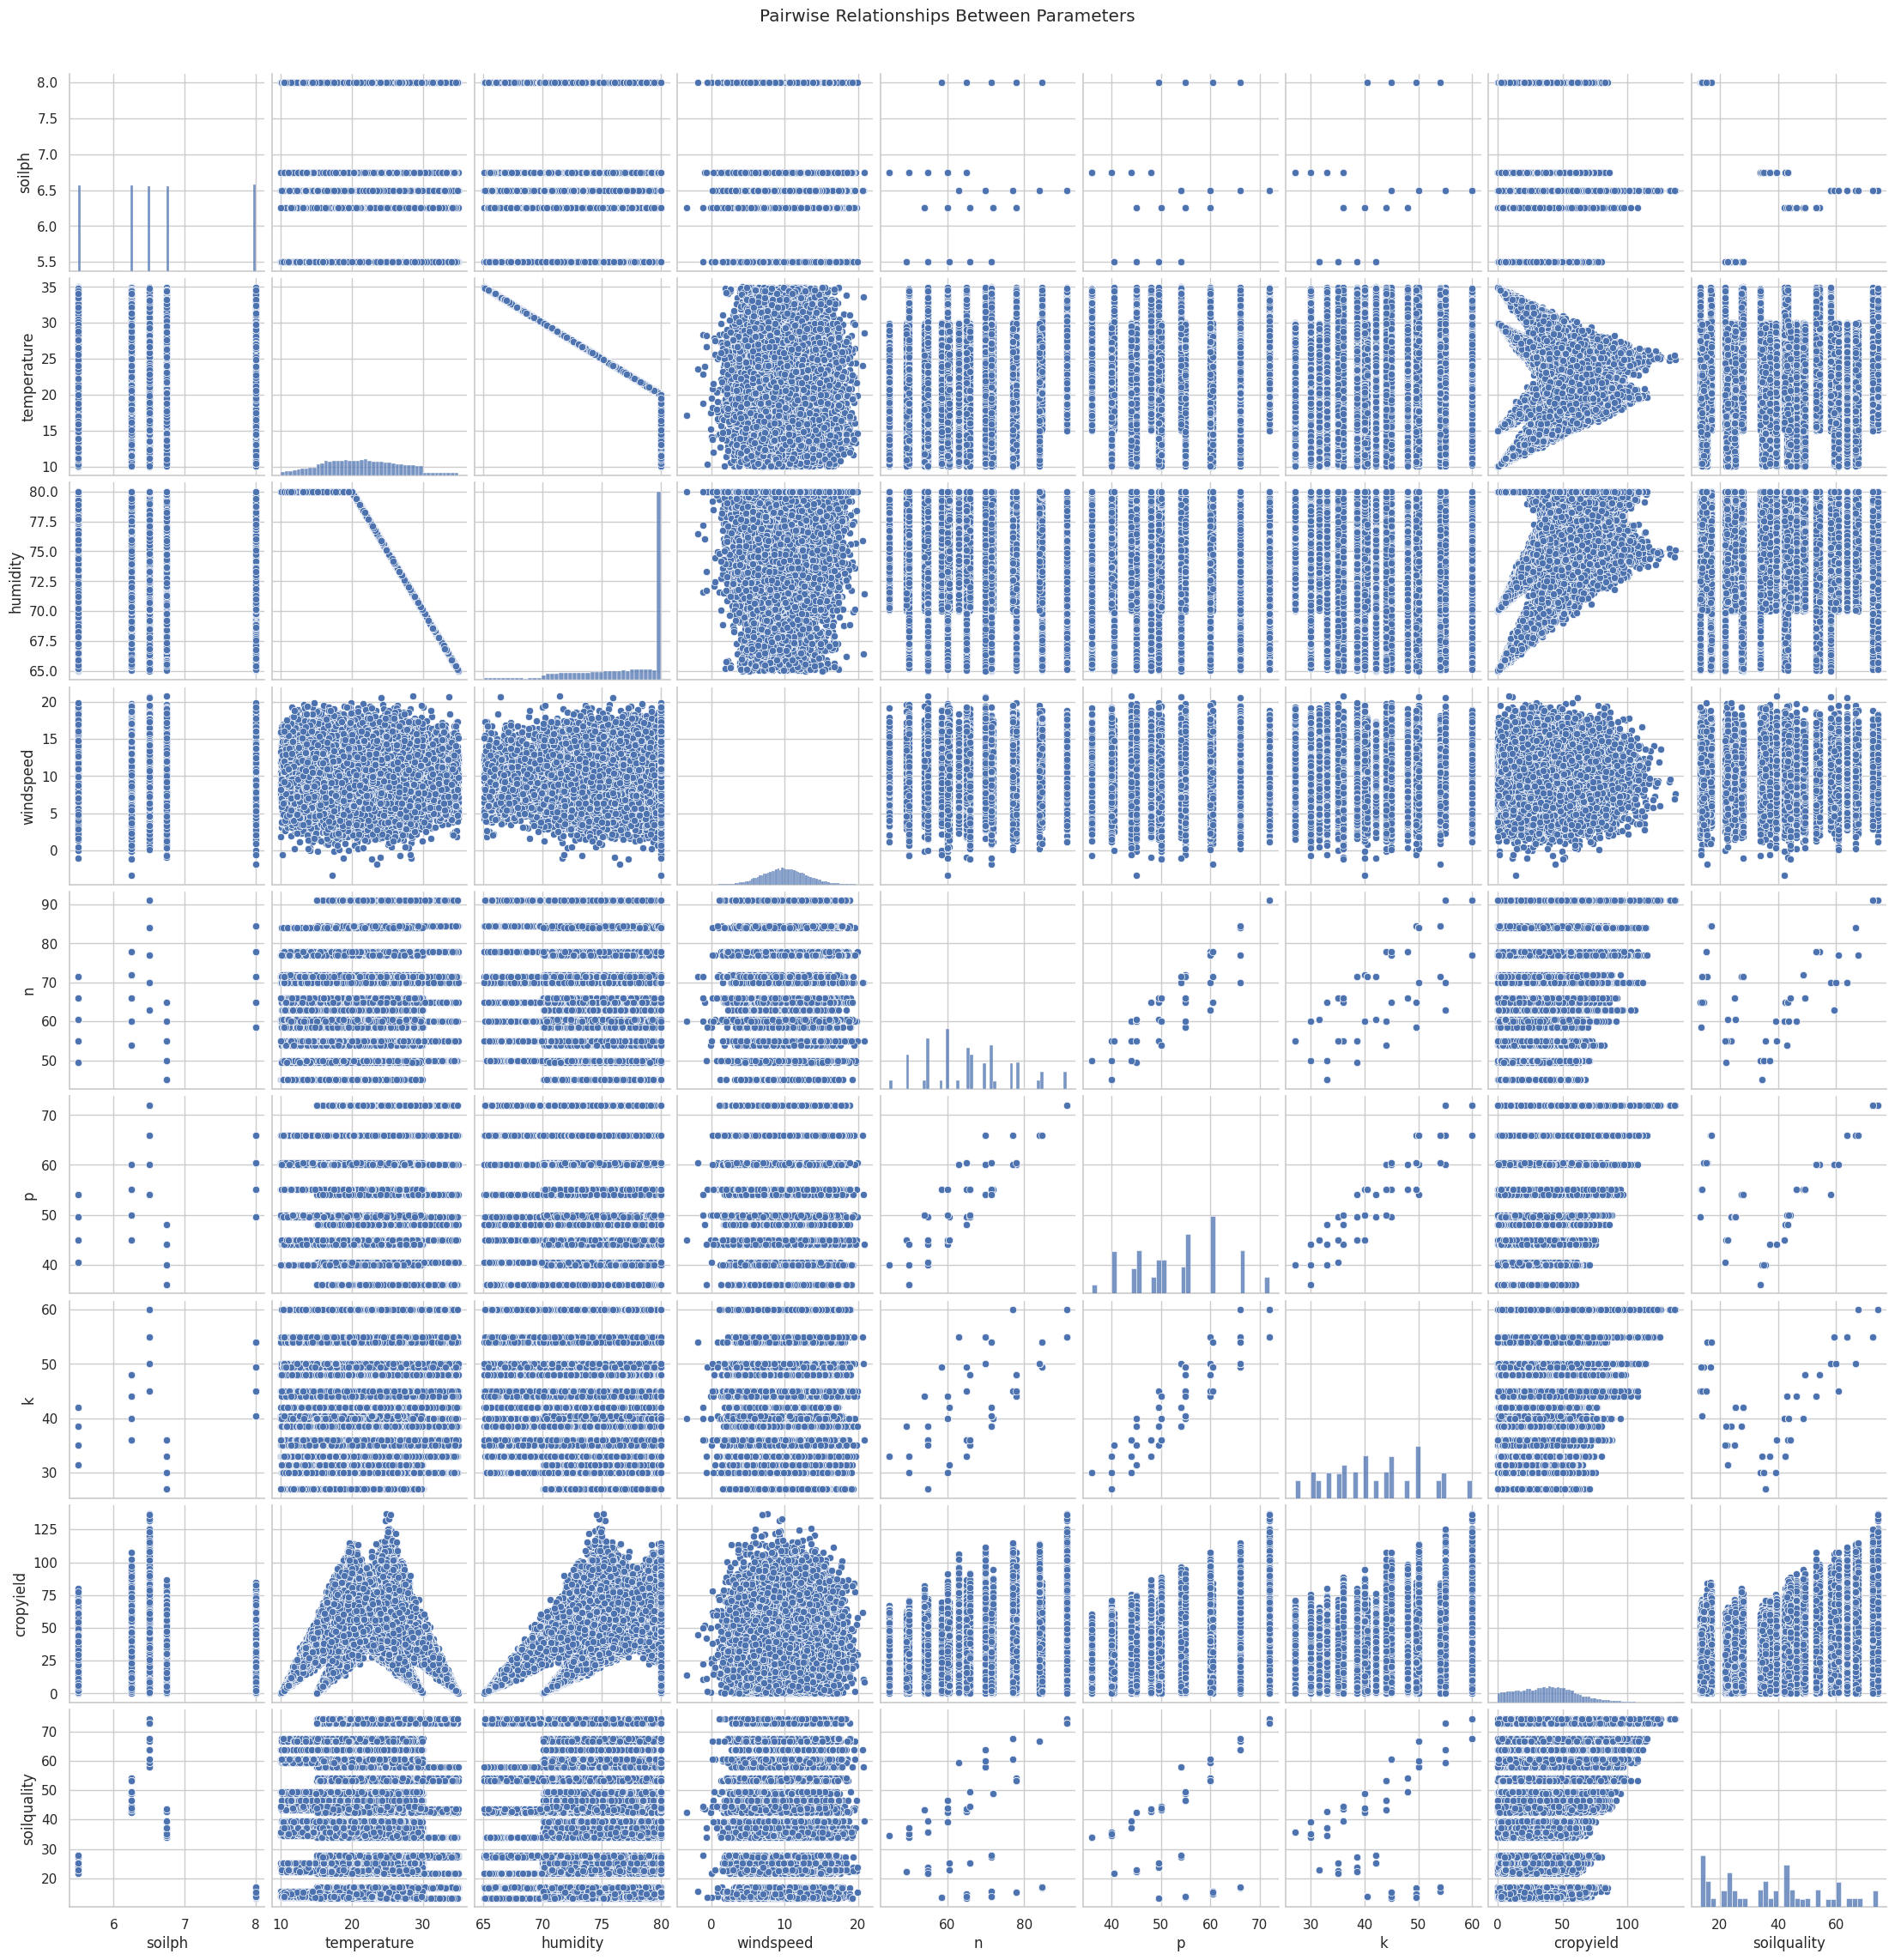

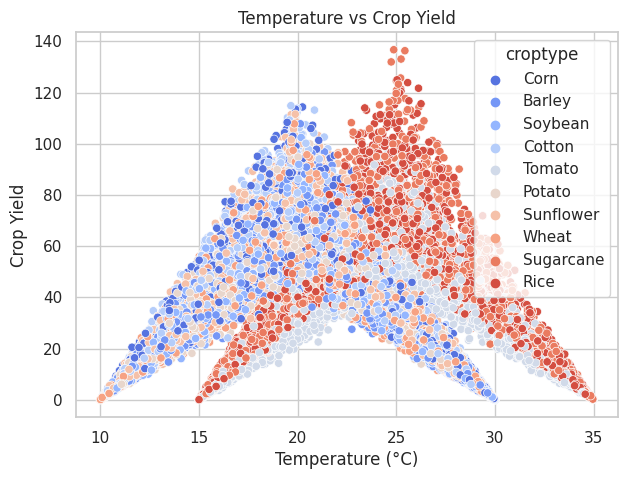

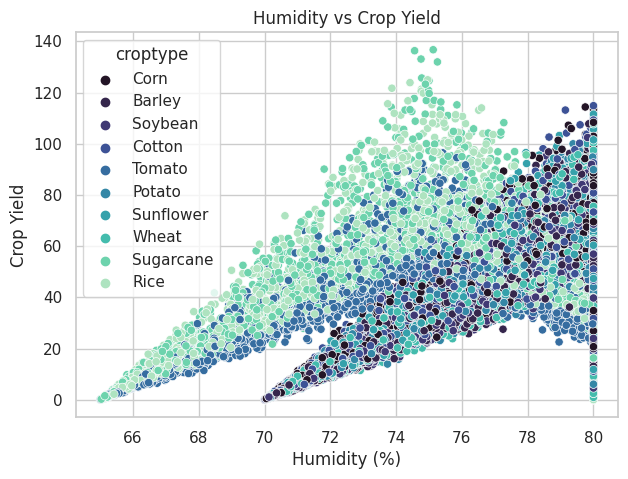

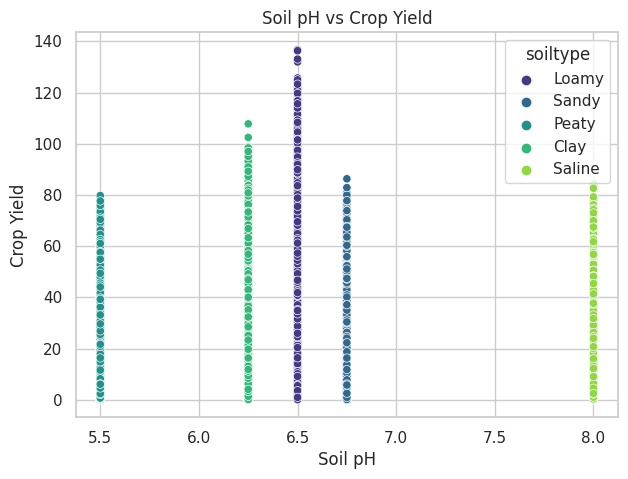

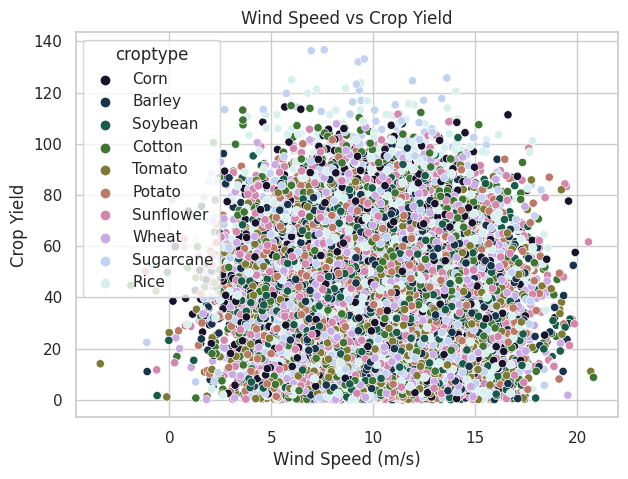

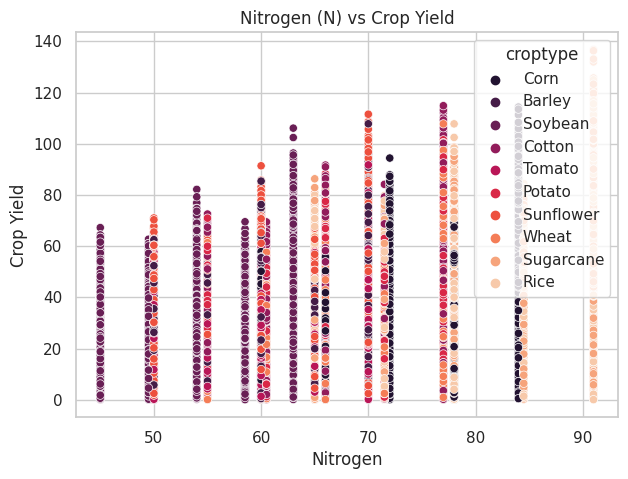

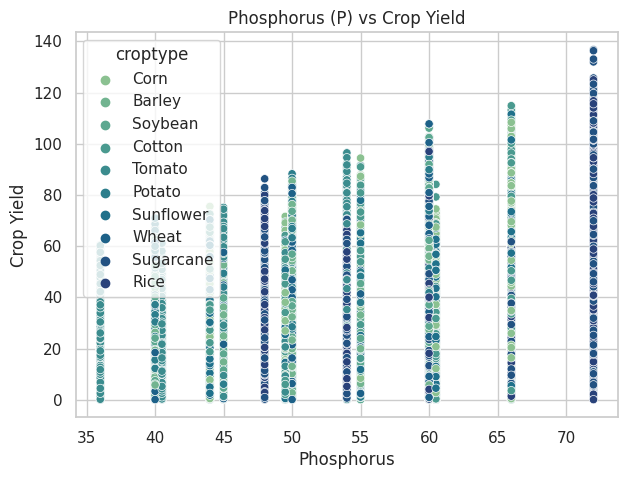

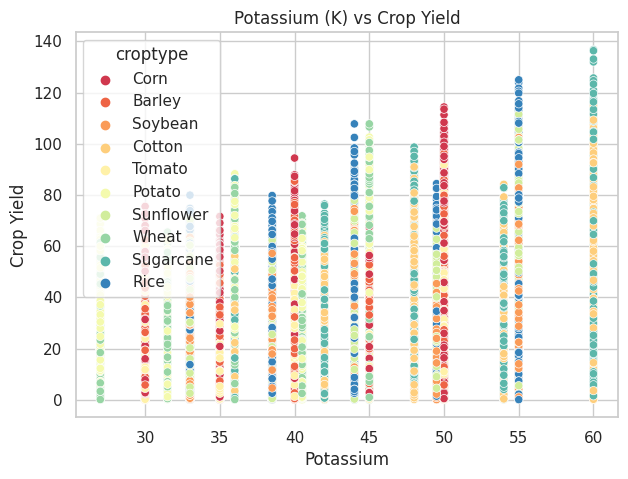

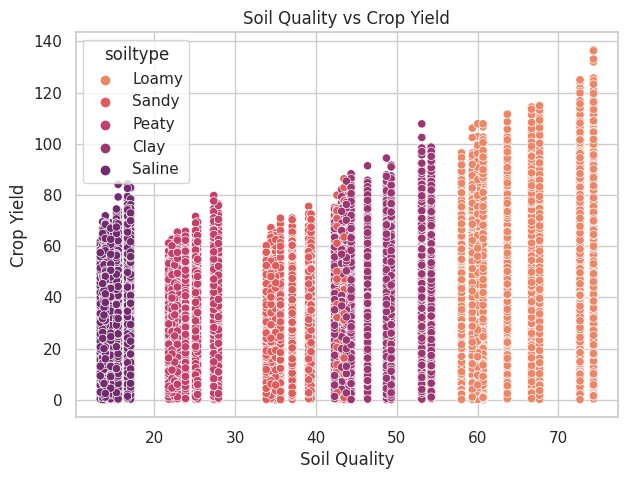

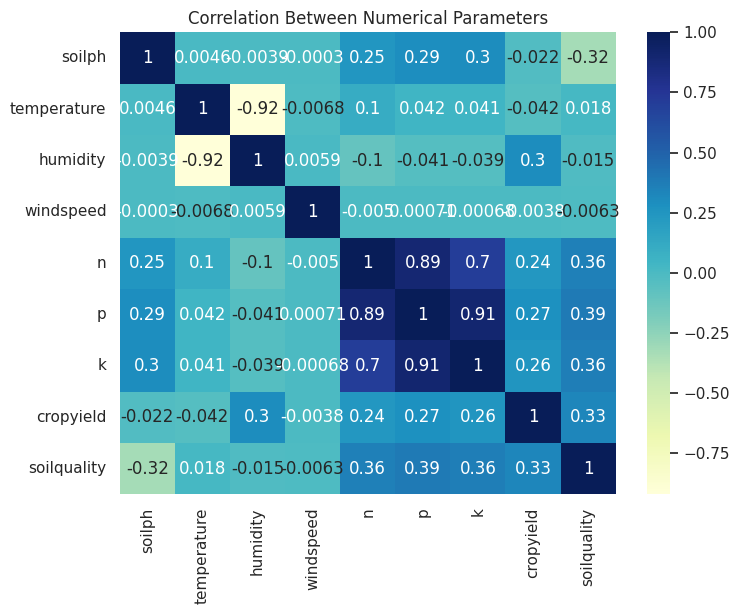

In [41]:
# 📊 Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# Clean up infinite and NaN values
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['cropyield'])  # optional: remove rows missing cropyield

# Ignore deprecation warnings from seaborn/pandas
warnings.filterwarnings("ignore", category=FutureWarning)


# Set visual style
sns.set(style="whitegrid")

# --- Step 1: Define numeric columns ---
numeric_columns = ['soilph', 'temperature', 'humidity', 'windspeed', 'n', 'p', 'k', 'cropyield', 'soilquality']

# --- Step 2: Pairplot: compares all numeric parameters with each other ---
sns.pairplot(data[numeric_columns])
plt.suptitle("Pairwise Relationships Between Parameters", y=1.02)
plt.show()

# --- Step 3: Individual comparisons (parameter vs Crop Yield) ---

# Temperature vs Crop Yield
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='temperature', y='cropyield', hue='croptype', palette='coolwarm')
plt.title("Temperature vs Crop Yield")
plt.xlabel("Temperature (°C)")
plt.ylabel("Crop Yield")
plt.show()

# Humidity vs Crop Yield
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='humidity', y='cropyield', hue='croptype', palette='mako')
plt.title("Humidity vs Crop Yield")
plt.xlabel("Humidity (%)")
plt.ylabel("Crop Yield")
plt.show()

# Soil pH vs Crop Yield
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='soilph', y='cropyield', hue='soiltype', palette='viridis')
plt.title("Soil pH vs Crop Yield")
plt.xlabel("Soil pH")
plt.ylabel("Crop Yield")
plt.show()

# Wind Speed vs Crop Yield
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='windspeed', y='cropyield', hue='croptype', palette='cubehelix')
plt.title("Wind Speed vs Crop Yield")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Crop Yield")
plt.show()

# Nitrogen vs Crop Yield
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='n', y='cropyield', hue='croptype', palette='rocket')
plt.title("Nitrogen (N) vs Crop Yield")
plt.xlabel("Nitrogen")
plt.ylabel("Crop Yield")
plt.show()

# Phosphorus vs Crop Yield
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='p', y='cropyield', hue='croptype', palette='crest')
plt.title("Phosphorus (P) vs Crop Yield")
plt.xlabel("Phosphorus")
plt.ylabel("Crop Yield")
plt.show()

# Potassium vs Crop Yield
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='k', y='cropyield', hue='croptype', palette='Spectral')
plt.title("Potassium (K) vs Crop Yield")
plt.xlabel("Potassium")
plt.ylabel("Crop Yield")
plt.show()

# Soil Quality vs Crop Yield
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='soilquality', y='cropyield', hue='soiltype', palette='flare')
plt.title("Soil Quality vs Crop Yield")
plt.xlabel("Soil Quality")
plt.ylabel("Crop Yield")
plt.show()

# --- Step 4: Correlation Heatmap ---
plt.figure(figsize=(8, 6))
corr = data[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Between Numerical Parameters")
plt.show()



In [42]:
print(data.columns.tolist())
 

['date', 'croptype', 'soiltype', 'soilph', 'temperature', 'humidity', 'windspeed', 'n', 'p', 'k', 'cropyield', 'soilquality']


In [43]:
#MILESTONE 2
# ⚙️ Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ✅ Step 1: Define features and target
X = data.drop('cropyield', axis=1)
y = data['cropyield']

# ✅ Step 2: Identify categorical and numeric columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ✅ Step 3: Define encoders and scalers
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

# ✅ Step 4: Create a ColumnTransformer (combine encoder + scaler)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', encoder, categorical_features)
    ]
)

# ✅ Step 5: Combine with model (example: RandomForest)
model = RandomForestRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# ✅ Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 7: Fit the pipeline
pipeline.fit(X_train, y_train)

# ✅ Step 8: Evaluate
y_pred = pipeline.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9555660618686728
RMSE: 4.737940619022016


In [44]:
# Cell A1: Evaluate pipeline (if not already done) and save it
import joblib
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# assume 'pipeline' and X_test, y_test exist from your earlier pipeline cell
y_pred = pipeline.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Save the pipeline for later use
joblib.dump(pipeline, "/kaggle/working/best_pipeline.joblib")
print("Saved pipeline to /kaggle/working/best_pipeline.joblib")



R2: 0.9555660618686728
RMSE: 4.737940619022016
Saved pipeline to /kaggle/working/best_pipeline.joblib


In [45]:
 
  print(pipe.feature_names_in_)


['date' 'croptype' 'soiltype' 'soilph' 'temperature' 'humidity'
 'windspeed' 'n' 'p' 'k' 'soilquality']


In [46]:
# Cell A2: Example interactive prediction function
import pandas as pd
import numpy as np
import joblib

# load saved pipeline
pipe = joblib.load("/kaggle/working/best_pipeline.joblib")

def predict_from_dict(input_dict):
    """
    input_dict: {feature_name: value, ...}
    All keys must match the columns used when training (except target).
    """
    X = pd.DataFrame([input_dict])
    # ensure column order matches training columns (pipeline ColumnTransformer handles unseen columns if configured)
    pred = pipe.predict(X)[0]
    return pred

# Example usage (replace values with real ones)
sample_input = {
    "date": "2023-07-15",     # same format as training
    "croptype": "Corn",
    "soiltype": "Loamy",
    "soilph": 6.8,
    "temperature": 32,
    "humidity": 65,
    "windspeed": 12,
    "n": 50,
    "p": 30,
    "k": 20,
    "soilquality": 7.5
}

print("Predicted crop yield:", predict_from_dict(sample_input))

Predicted crop yield: 0.20728826600045397


In [47]:

import pandas as pd
import numpy as np

# Step 1: Remove zero yield rows
data = data[data['cropyield'] > 0].reset_index(drop=True)

# Step 2: Create daily date column and set it as index
data['date'] = pd.date_range(start='2023-01-01', periods=len(data), freq='D')
data = data.set_index('date')

# Step 3: Select only numeric columns for time series analysis
numeric_cols = ['soilph', 'temperature', 'humidity', 'windspeed', 'n', 'p', 'k', 'cropyield']

# Step 4: Resample data per day (mean values)
daily_data = data[numeric_cols].resample('D').mean().dropna()

daily_data.head()


soilph  temperature   humidity  windspeed     n     p     k  \
date                                                                      
2023-01-01    6.50    20.052576  79.947424   8.591577  84.0  66.0  50.0   
2023-01-02    6.75    19.751848  80.000000   2.682683  50.0  40.0  30.0   
2023-01-03    5.50    16.110395  80.000000   7.696070  49.5  45.0  38.5   
2023-01-04    6.75    14.826739  80.000000  10.366657  55.0  44.0  36.0   
2023-01-05    6.25    18.323272  80.000000   8.198084  60.0  45.0  40.0   

             cropyield  
date                    
2023-01-01  104.871310  
2023-01-02   58.939796  
2023-01-03   32.970413  
2023-01-04   29.356115  
2023-01-05   22.221375

In [48]:
# Select only numeric columns for resampling
numeric_cols = ['soilph', 'temperature', 'humidity', 'windspeed', 'n', 'p', 'k', 'cropyield']

# Resample per day (mean of numeric columns)
daily_data = data[numeric_cols].resample('D').mean().dropna()

daily_data.head()



soilph  temperature   humidity  windspeed     n     p     k  \
date                                                                      
2023-01-01    6.50    20.052576  79.947424   8.591577  84.0  66.0  50.0   
2023-01-02    6.75    19.751848  80.000000   2.682683  50.0  40.0  30.0   
2023-01-03    5.50    16.110395  80.000000   7.696070  49.5  45.0  38.5   
2023-01-04    6.75    14.826739  80.000000  10.366657  55.0  44.0  36.0   
2023-01-05    6.25    18.323272  80.000000   8.198084  60.0  45.0  40.0   

             cropyield  
date                    
2023-01-01  104.871310  
2023-01-02   58.939796  
2023-01-03   32.970413  
2023-01-04   29.356115  
2023-01-05   22.221375

In [49]:
print(data.columns)


Index(['croptype', 'soiltype', 'soilph', 'temperature', 'humidity',
       'windspeed', 'n', 'p', 'k', 'cropyield', 'soilquality'],
      dtype='object')


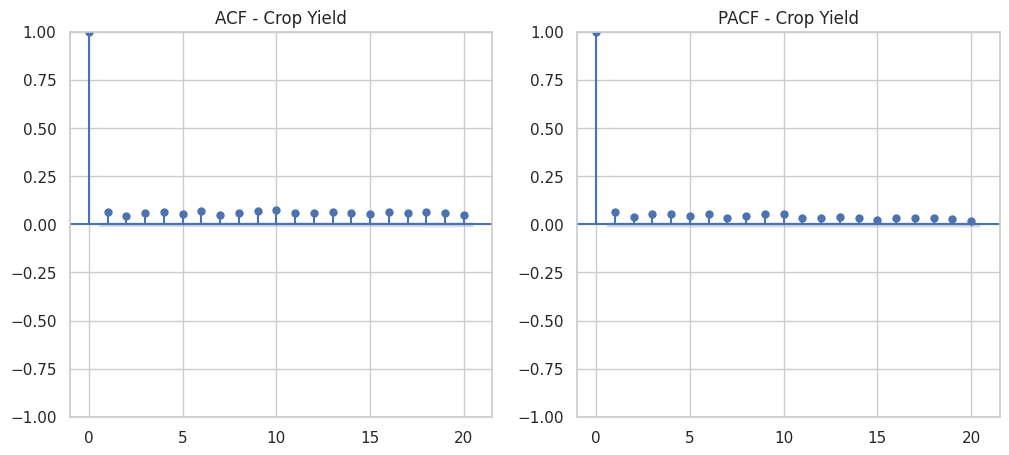

ADF Statistic: -12.020126764996046
p-value: 3.037185498440099e-22
✅ Stationary (Reject Null Hypothesis)

KPSS Statistic: 0.15516274034264166
p-value: 0.1
✅ Stationary (Fail to Reject Null Hypothesis)


/tmp/ipykernel_37/3530411256.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(ts, regression='c', nlags="auto")


In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

# Choose the numeric target column for analysis
ts = daily_data['cropyield']

# --- Plot ACF & PACF ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(ts, ax=plt.gca(), lags=20)
plt.title('ACF - Crop Yield')

plt.subplot(1,2,2)
plot_pacf(ts, ax=plt.gca(), lags=20)
plt.title('PACF - Crop Yield')
plt.show()

# --- ADF Test (Augmented Dickey-Fuller) ---
adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("✅ Stationary (Reject Null Hypothesis)")
else:
    print("❌ Non-Stationary (Fail to Reject Null Hypothesis)")

# --- KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin) ---
kpss_result = kpss(ts, regression='c', nlags="auto")
print("\nKPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
if kpss_result[1] > 0.05:
    print("✅ Stationary (Fail to Reject Null Hypothesis)")
else:
    print("❌ Non-Stationary (Reject Null Hypothesis)")


In [51]:
print(data.head())
print(data.index)


           croptype soiltype  soilph  temperature   humidity  windspeed     n  \
date                                                                            
2023-01-01     Corn    Loamy    6.50    20.052576  79.947424   8.591577  84.0   
2023-01-02   Barley    Sandy    6.75    19.751848  80.000000   2.682683  50.0   
2023-01-03  Soybean    Peaty    5.50    16.110395  80.000000   7.696070  49.5   
2023-01-04   Cotton    Sandy    6.75    14.826739  80.000000  10.366657  55.0   
2023-01-05   Tomato     Clay    6.25    18.323272  80.000000   8.198084  60.0   

               p     k   cropyield  soilquality  
date                                             
2023-01-01  66.0  50.0  104.871310    66.666667  
2023-01-02  40.0  30.0   58.939796    35.000000  
2023-01-03  45.0  38.5   32.970413    22.166667  
2023-01-04  44.0  36.0   29.356115    39.375000  
2023-01-05  45.0  40.0   22.221375    42.291667  
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
           

In [52]:
# 1. Check correlation between consecutive days
data['cropyield'].autocorr(lag=1)


0.06418694188652802

In [53]:
# 2. Check if it's stationary (ADF test)
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['cropyield'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -12.020126764996046
p-value: 3.037185498440099e-22


<Axes: xlabel='date'>

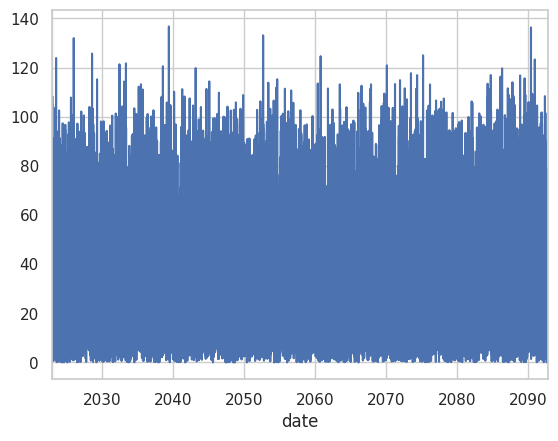

In [54]:
data['cropyield'].plot()


In [55]:
import numpy as np
import pandas as pd

# Make sure your data has a daily datetime index already
if 'date' not in data.columns:
    data['date'] = pd.date_range(start='2023-01-01', periods=len(data), freq='D')
data.set_index('date', inplace=True)

# Copy only the numeric columns you’re using
numeric_cols = ['soilph', 'temperature', 'humidity', 'windspeed', 'n', 'p', 'k', 'cropyield']

# Create a synthetic trend in crop yield — gradual increase + random noise
np.random.seed(42)
trend = np.linspace(50, 150, len(data))        # smooth upward trend
noise = np.random.normal(0, 5, len(data))      # add small noise
data['cropyield'] = trend + noise              # replace existing cropyield

# Resample to daily mean (even though it’s already daily)
daily_data = data[numeric_cols].resample('D').mean().dropna()

daily_data.head()


soilph  temperature   humidity  windspeed     n     p     k  \
date                                                                      
2023-01-01    6.50    20.052576  79.947424   8.591577  84.0  66.0  50.0   
2023-01-02    6.75    19.751848  80.000000   2.682683  50.0  40.0  30.0   
2023-01-03    5.50    16.110395  80.000000   7.696070  49.5  45.0  38.5   
2023-01-04    6.75    14.826739  80.000000  10.366657  55.0  44.0  36.0   
2023-01-05    6.25    18.323272  80.000000   8.198084  60.0  45.0  40.0   

            cropyield  
date                   
2023-01-01  52.483571  
2023-01-02  49.312601  
2023-01-03  53.246288  
2023-01-04  57.626917  
2023-01-05  48.844923

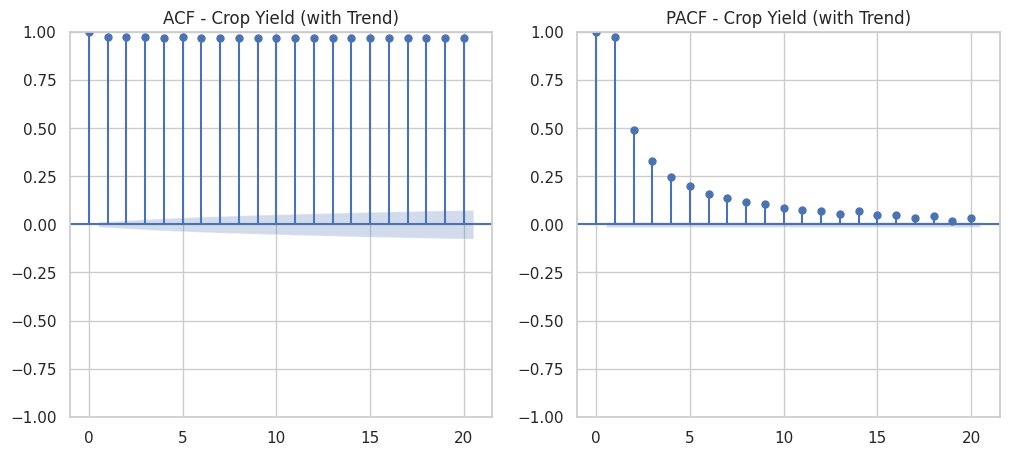

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(daily_data['cropyield'], lags=20, ax=plt.gca())
plt.title('ACF - Crop Yield (with Trend)')

plt.subplot(1, 2, 2)
plot_pacf(daily_data['cropyield'], lags=20, ax=plt.gca())
plt.title('PACF - Crop Yield (with Trend)')

plt.show()


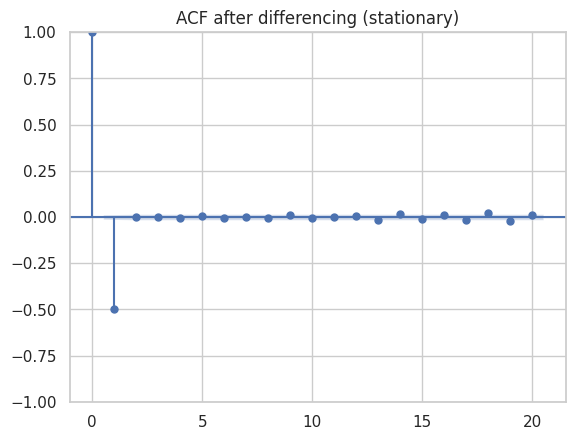

In [57]:
diff_yield = daily_data['cropyield'].diff().dropna()
plot_acf(diff_yield, lags=20)
plt.title('ACF after differencing (stationary)')
plt.show()


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define which columns are numeric and categorical
numeric_features = ['Temperature', 'Humidity', 'Wind_Speed', 'Soil_pH', 'N', 'P', 'K']
categorical_features = ['Crop_Type', 'Soil_Type']

# Define transformations
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [27]:
import pandas as pd

# ✅ Correct file path
data = pd.read_csv("/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv")

print("✅ Data loaded successfully!")
print(data.head())



✅ Data loaded successfully!
         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  


In [32]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['Crop_Yield'])  # all features except target
y = data['Crop_Yield']                 # target variable

# Split chronologically for time series (no random shuffling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (29216, 11)
Testing shape: (7304, 11)


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"{name} → R²: {r2_score(y_test, y_pred):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Linear Regression → R²: 0.6483, RMSE: 15.4118
Decision Tree → R²: 0.9587, RMSE: 5.2795
Random Forest → R²: 0.9769, RMSE: 3.9535


In [26]:
import os

for root, dirs, files in os.walk("/kaggle/input"):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv


In [31]:
print(data.columns.tolist())


['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']


In [34]:
print("Columns in dataset:", X_train.columns.tolist())


Columns in dataset: ['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"{name} → R²: {r2_score(y_test, y_pred):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Linear Regression → R²: 0.6483, RMSE: 15.4118
Decision Tree → R²: 0.9587, RMSE: 5.2795
Random Forest → R²: 0.9769, RMSE: 3.9535


[](http://)

###########   TIME SERIES FORECASTING   ###########


In [52]:

import pandas as pd

# Load dataset
data = pd.read_csv("/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv")

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as index (important for time series operations)
data = data.set_index('Date')

# Quick check
data.head()


Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  Wind_Speed  \
Date                                                                          
2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   10.956707   
2014-01-01      Corn     Loamy     6.50    20.052576  79.947424    8.591577   
2014-01-01      Rice     Peaty     5.50    12.143099  80.000000    7.227751   
2014-01-01    Barley     Sandy     6.75    19.751848  80.000000    2.682683   
2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000    7.696070   

               N     P     K  Crop_Yield  Soil_Quality  
Date                                                    
2014-01-01  60.5  45.0  31.5    0.000000     22.833333  
2014-01-01  84.0  66.0  50.0  104.871310     66.666667  
2014-01-01  71.5  54.0  38.5    0.000000     27.333333  
2014-01-01  50.0  40.0  30.0   58.939796     35.000000  
2014-01-01  49.5  45.0  38.5   32.970413     22.166667

In [53]:
# Keep only numeric columns
numeric = data.select_dtypes(include=['number'])

# Resample to daily frequency (mean of all numeric columns per day)
daily_data = numeric.resample('D').mean()

# Handle missing values (interpolate or forward-fill)
daily_data = daily_data.interpolate(method='time')

# Drop rows where Crop_Yield is missing
daily_data = daily_data.dropna(subset=['Crop_Yield'])

print("✅ Daily data shape:", daily_data.shape)
daily_data.head()


✅ Daily data shape: (3652, 9)


Soil_pH  Temperature   Humidity  Wind_Speed      N      P      K  \
Date                                                                           
2014-01-01    6.275    15.994309  79.994742    8.163837  64.55  51.60  40.50   
2014-01-02    6.575    15.639907  79.998234    9.669001  67.00  54.05  43.15   
2014-01-03    6.450    15.156596  79.028168   11.052915  66.50  53.30  42.35   
2014-01-04    6.950    15.026332  79.479529   10.162655  68.70  55.80  44.75   
2014-01-05    6.400    13.828252  80.000000   10.523809  68.45  55.65  45.00   

            Crop_Yield  Soil_Quality  
Date                                  
2014-01-01   37.073799     35.920833  
2014-01-02   34.636737     32.750000  
2014-01-03   22.107670     41.579167  
2014-01-04   28.197627     40.587500  
2014-01-05   26.062550     51.362500

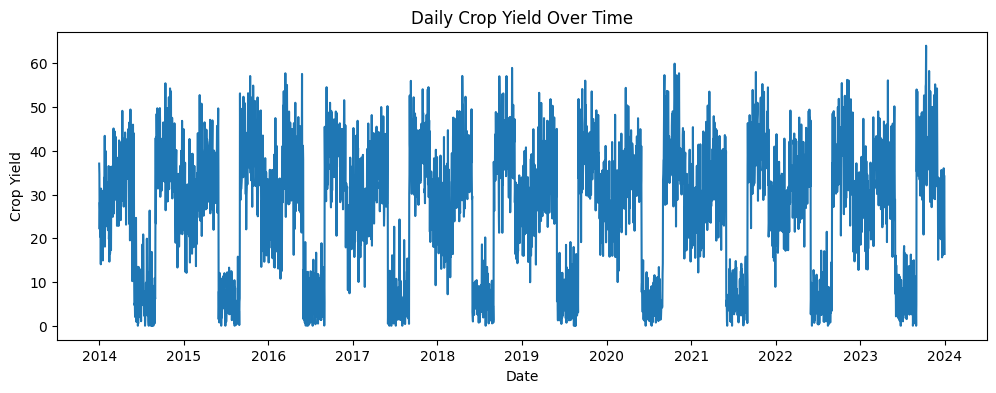

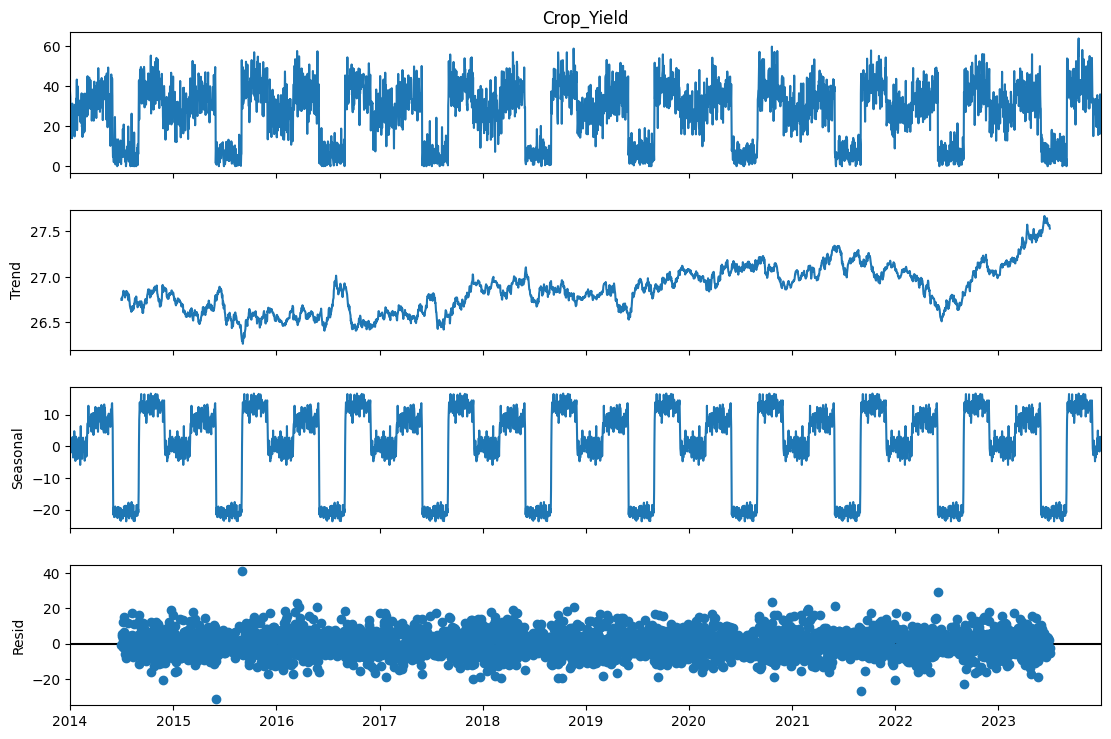

In [54]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot Crop Yield over time
plt.figure(figsize=(12,4))
plt.plot(daily_data['Crop_Yield'])
plt.title("Daily Crop Yield Over Time")
plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.show()

# Try decomposing (trend, seasonality, residual)
try:
    decomposition = seasonal_decompose(daily_data['Crop_Yield'], model='additive', period=365)
    fig = decomposition.plot()
    fig.set_size_inches(12,8)
    plt.show()
except Exception as e:
    print("Decomposition skipped (try changing 'period' if needed):", e)


<Figure size 1000x400 with 0 Axes>

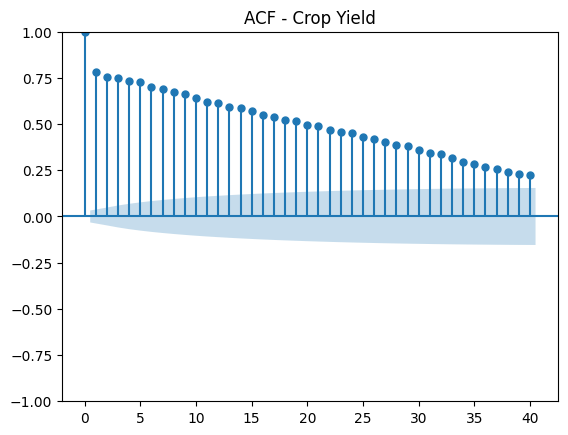

<Figure size 1000x400 with 0 Axes>

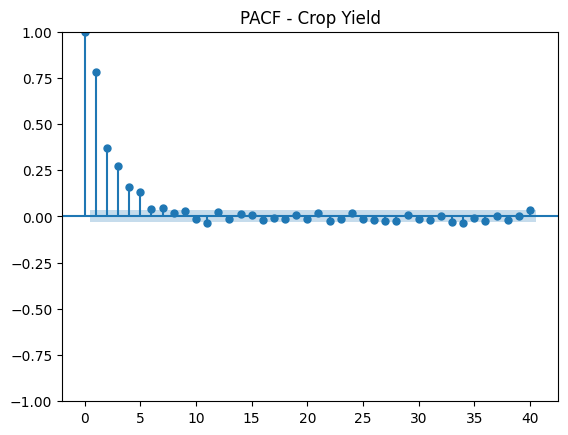

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts = daily_data['Crop_Yield']

plt.figure(figsize=(10,4))
plot_acf(ts, lags=40)
plt.title("ACF - Crop Yield")
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(ts, lags=40, method='ywm')
plt.title("PACF - Crop Yield")
plt.show()


In [ ]:
# First-order differencing
ts_diff = ts.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(ts_diff)
plt.title("1st Difference of Crop Yield")
plt.show()

# Re-run stationarity tests
print("ADF on Differenced Series:")
adf_test(ts_diff)

print("\nKPSS on Differenced Series:")
kpss_test(ts_diff)


In [56]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    result = adfuller(timeseries.dropna(), autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("✅ Stationary (Reject Null Hypothesis)")
    else:
        print("❌ Non-Stationary (Fail to Reject Null)")

def kpss_test(timeseries, regression='c'):
    result = kpss(timeseries.dropna(), regression=regression, nlags="auto")
    print("\nKPSS Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] > 0.05:
        print("✅ Stationary (Fail to Reject Null Hypothesis)")
    else:
        print("❌ Non-Stationary (Reject Null Hypothesis)")

print(">>> ADF Test:")
adf_test(ts)

print("\n>>> KPSS Test:")
kpss_test(ts)


>>> ADF Test:
ADF Statistic: -6.236677196899413
p-value: 4.806731874424591e-08
✅ Stationary (Reject Null Hypothesis)

>>> KPSS Test:

KPSS Statistic: 0.01902089824793467
p-value: 0.1
✅ Stationary (Fail to Reject Null Hypothesis)


/tmp/ipykernel_37/95425377.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(timeseries.dropna(), regression=regression, nlags="auto")


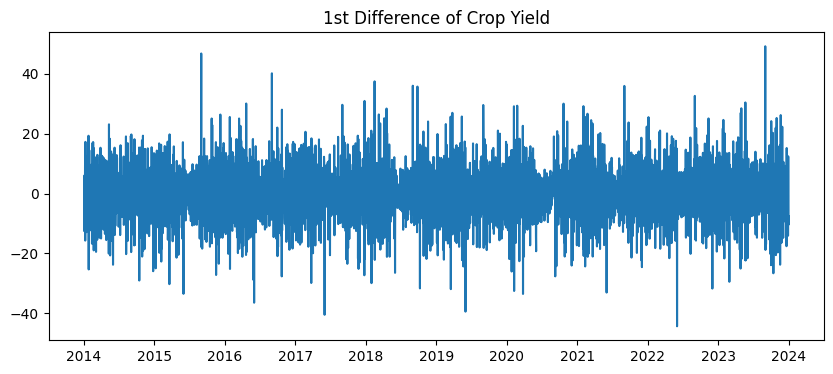

ADF on Differenced Series:
ADF Statistic: -22.507818305217853
p-value: 0.0
✅ Stationary (Reject Null Hypothesis)

KPSS on Differenced Series:

KPSS Statistic: 0.01712963038856816
p-value: 0.1
✅ Stationary (Fail to Reject Null Hypothesis)


/tmp/ipykernel_37/95425377.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(timeseries.dropna(), regression=regression, nlags="auto")


In [57]:
# First-order differencing
ts_diff = ts.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(ts_diff)
plt.title("1st Difference of Crop Yield")
plt.show()

# Re-run stationarity tests
print("ADF on Differenced Series:")
adf_test(ts_diff)

print("\nKPSS on Differenced Series:")
kpss_test(ts_diff)


In [58]:
# Sort by date just to be sure
data = data.sort_index()

# Define target and features (if needed)
y = data["Crop_Yield"]

# 80% training, 20% testing (chronological split)
split_point = int(len(y) * 0.8)
y_train, y_test = y[:split_point], y[split_point:]

print("Training data:", y_train.shape)
print("Testing data:", y_test.shape)


Training data: (29216,)
Testing data: (7304,)


In [97]:
y_train = y_train.asfreq('ME')
y_test = y_test.asfreq('ME')


In [98]:
from statsmodels.tsa.arima.model import ARIMA

# Build and train model
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
# Forecast
y_pred = model_fit.forecast(steps=len(y_test))
print(model_fit.summary())
print("R² Score:", r2_score(y_test, y_pred))


                               SARIMAX Results                                
Dep. Variable:             Crop_Yield   No. Observations:                  959
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4464.840
Date:                Wed, 05 Nov 2025   AIC                           8935.680
Time:                        15:08:20   BIC                           8950.274
Sample:                    01-31-2014   HQIC                          8941.238
                         - 11-30-2093                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0161      0.038      0.427      0.670      -0.058       0.090
ma.L1         -0.8485      0.022    -38.046      0.000      -0.892      -0.805
sigma2       653.2715     27.207     24.011      0.0

In [99]:
!pip install pmdarima

from pmdarima import auto_arima

auto_model = auto_arima(y_train, seasonal=False, trace=True, suppress_warnings=True)
best_order = auto_model.order
print("Best ARIMA order:", best_order)

model = ARIMA(y_train, order=best_order)
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(y_test))
print("R² Score:", r2_score(y_test, y_pred))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=8944.081, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9727.619, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9250.746, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9472.085, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8943.789, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=9350.061, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8941.844, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8943.788, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9108.302, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8916.161, Time=0.85 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8992.529, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8979.798, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8918.064, Time=1.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8918.062, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept

/tmp/ipykernel_37/2994557620.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_train = y_train.asfreq('M')
/tmp/ipykernel_37/2994557620.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_test = y_test.asfreq('M')


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: -0.0033
RMSE: 26.0318
MAE: 22.2185


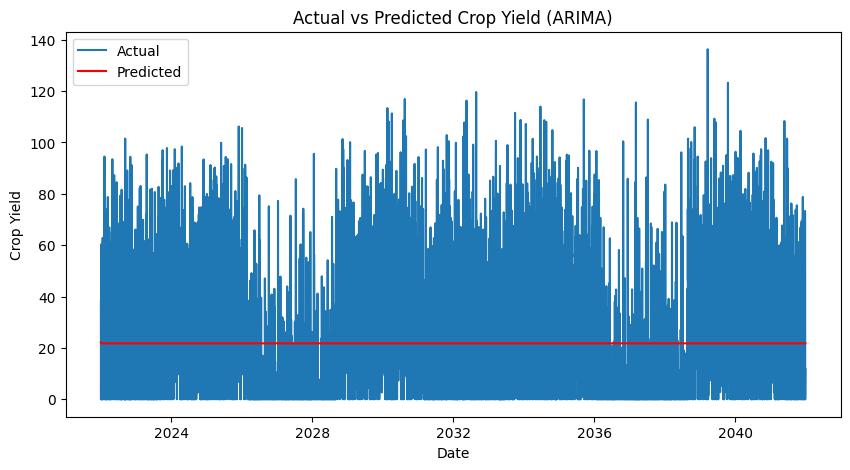

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title("Actual vs Predicted Crop Yield (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.legend()
plt.show()


In [72]:
from statsmodels.tsa.stattools import kpss

result = kpss(y_train.dropna(), regression='c', nlags='auto')
print(f"KPSS Statistic: {result[0]}, p-value: {result[1]}")


KPSS Statistic: 0.06853768576105443, p-value: 0.1


/tmp/ipykernel_37/719925056.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(y_train.dropna(), regression='c', nlags='auto')


✅ Shapes:
y_train: (2921,)
exog_train: (2921, 8)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Crop_Yield   No. Observations:                 2921
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -15159.021
Date:                Wed, 05 Nov 2025   AIC                          30340.041
Time:                        15:44:55   BIC                          30405.806
Sample:                    01-01-2014   HQIC                         30363.730
                         - 12-30-2021                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature     50.4782      0.502    100.612      0.000      49.495      51.461
Humidity        83.2684      0.641    129.975      0.000      82.013      84.524
Wind_Speed      -0.0866      0.841     -0.10

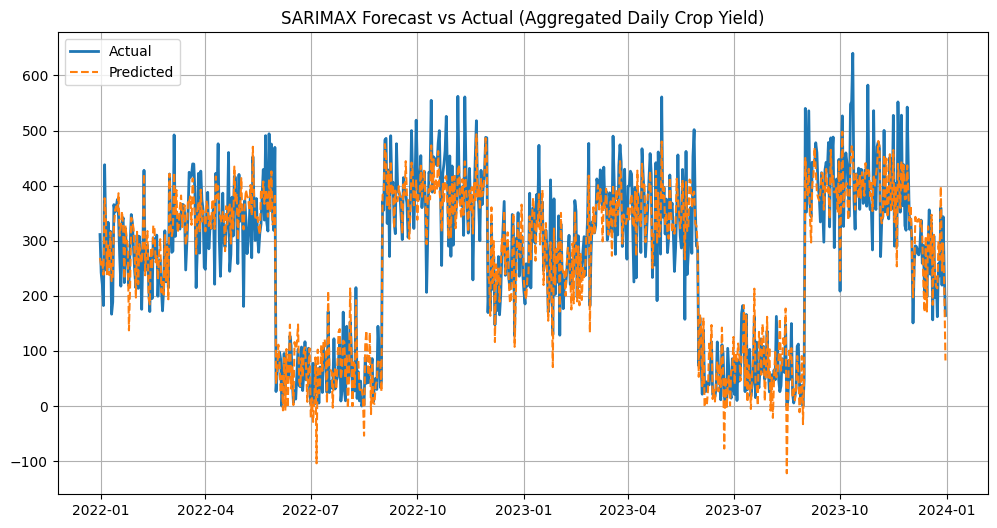

In [132]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -------------------------------
# STEP 1: Load dataset
# -------------------------------
df = pd.read_csv("/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv", parse_dates=['Date'])

# -------------------------------
# STEP 2: Aggregate by date
# -------------------------------
df_daily = df.groupby('Date').agg({
    'Crop_Yield': 'sum',          # Sum of yields per day
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Wind_Speed': 'mean',
    'Soil_pH': 'mean',
    'N': 'mean',
    'P': 'mean',
    'K': 'mean',
    'Soil_Quality': 'mean'
}).sort_index()

# Set datetime index and frequency
df_daily.index = pd.to_datetime(df_daily.index)
df_daily = df_daily.asfreq('D')  # daily frequency

# -------------------------------
# STEP 3: Define target and exogenous variables
# -------------------------------
y = df_daily['Crop_Yield']
exog = df_daily[['Temperature', 'Humidity', 'Wind_Speed', 'Soil_pH', 'N', 'P', 'K', 'Soil_Quality']]

# -------------------------------
# STEP 4: Train-test split (80-20)
# -------------------------------
split = int(len(y) * 0.8)
y_train, y_test = y.iloc[:split], y.iloc[split:]
exog_train, exog_test = exog.iloc[:split], exog.iloc[split:]

# Ensure indices match
exog_train.index = y_train.index
exog_test.index = y_test.index

print("✅ Shapes:")
print("y_train:", y_train.shape)
print("exog_train:", exog_train.shape)

# -------------------------------
# STEP 5: Build SARIMAX model
# -------------------------------
model = SARIMAX(
    y_train,
    exog=exog_train,
    order=(1, 1, 1),         # ARIMA order (p,d,q)
    seasonal_order=(0, 0, 0, 0),  # no seasonality for now
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
sarimax_fit = model.fit(disp=False)
print(sarimax_fit.summary())

# -------------------------------
# STEP 6: Make predictions
# -------------------------------
y_pred = sarimax_fit.predict(
    start=y_test.index[0],
    end=y_test.index[-1],
    exog=exog_test
)

# -------------------------------
# STEP 7: Evaluate performance
# -------------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_test_nonzero = y_test[y_test != 0]
y_pred_nonzero = y_pred[y_test != 0]
mape_safe = np.mean(np.abs((y_test_nonzero - y_pred_nonzero)/y_test_nonzero)) * 100
print(f"\nMean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"MAPE (ignoring zeros): {mape_safe:.2f}%")

# -------------------------------
# STEP 8: Plot actual vs predicted
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('SARIMAX Forecast vs Actual (Aggregated Daily Crop Yield)')
plt.grid(True)
plt.show()


#######SARIMAX####

In [27]:
import pandas as pd

# ✅ Correct file path
data = pd.read_csv("/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv")

print("✅ Data loaded successfully!")
print(data.head())



✅ Data loaded successfully!
         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  


In [123]:
import os
print(os.listdir())


['.virtual_documents']


In [125]:
import pandas as pd

# Replace 'your_file.csv' with the actual name printed above
df = pd.read_csv("/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv")
print(df.head())     # shows first 5 rows
print(df.columns)    # shows all column names


         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  
Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


###prophet###

15:51:25 - cmdstanpy - INFO - Chain [1] start processing
15:51:25 - cmdstanpy - INFO - Chain [1] done processing


MSE: 2163.40
R²: 0.899
MAPE (ignoring zeros): 89.65%


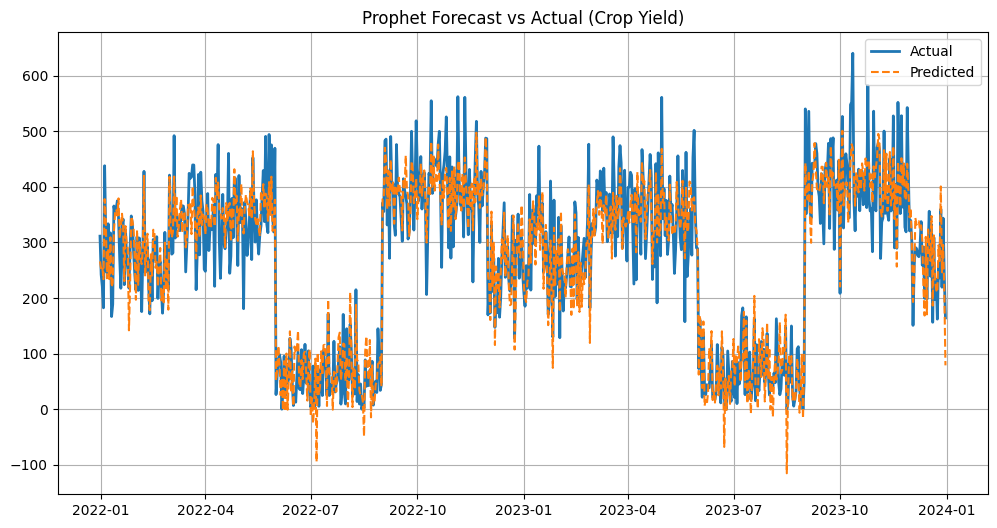

In [133]:
# -------------------------------
# STEP 1: Import libraries
# -------------------------------
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# STEP 2: Load dataset
# -------------------------------
df = pd.read_csv("/kaggle/input/crop-yield-and-environmental-factors-2014-2023/crop_yield_dataset.csv", parse_dates=['Date'])

# -------------------------------
# STEP 3: Aggregate daily (mean)
# -------------------------------
df_daily = df.groupby('Date').agg({
    'Crop_Yield': 'sum',          # total yield per day
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Wind_Speed': 'mean',
    'Soil_pH': 'mean',
    'N': 'mean',
    'P': 'mean',
    'K': 'mean',
    'Soil_Quality': 'mean'
}).sort_index()

df_daily.index = pd.to_datetime(df_daily.index)
df_daily = df_daily.asfreq('D')  # daily frequency

# -------------------------------
# STEP 4: Prepare data for Prophet
# -------------------------------
data = df_daily.reset_index().rename(columns={'Date': 'ds', 'Crop_Yield': 'y'})

# Define numeric regressors
regressors = ['Temperature', 'Humidity', 'Wind_Speed', 'Soil_pH', 'N', 'P', 'K', 'Soil_Quality']

# -------------------------------
# STEP 5: Train-test split
# -------------------------------
split = int(len(data) * 0.8)
train_df = data.iloc[:split].copy()
test_df = data.iloc[split:].copy()

# -------------------------------
# STEP 6: Initialize Prophet and add regressors
# -------------------------------
model = Prophet()

for reg in regressors:
    model.add_regressor(reg)

# Fit the model
model.fit(train_df)

# -------------------------------
# STEP 7: Make predictions
# -------------------------------
# Create a dataframe for future dates (use test set)
future = test_df.copy()  # must include regressors in same columns
forecast = model.predict(future)

# Extract predictions
y_pred = forecast['yhat'].values
y_test = test_df['y'].values

# -------------------------------
# STEP 8: Evaluate performance
# -------------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Safe MAPE (ignore zeros)
y_test_nonzero = y_test[y_test != 0]
y_pred_nonzero = y_pred[y_test != 0]
mape_safe = np.mean(np.abs((y_test_nonzero - y_pred_nonzero) / y_test_nonzero)) * 100

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")
print(f"MAPE (ignoring zeros): {mape_safe:.2f}%")

# -------------------------------
# STEP 9: Plot actual vs predicted
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(test_df['ds'], y_test, label='Actual', linewidth=2)
plt.plot(test_df['ds'], y_pred, label='Predicted', linestyle='--')
plt.title('Prophet Forecast vs Actual (Crop Yield)')
plt.legend()
plt.grid(True)
plt.show()


Export the trained models:

For SARIMAX:

In [140]:
import pickle

# Save SARIMAX model
with open('sarimax_model.pkl', 'wb') as f:
    pickle.dump(sarimax_fit, f)

# Load it later
# with open('sarimax_model.pkl', 'rb') as f:
#     sarimax_fit = pickle.load(f)


For Prophet:

In [144]:
from prophet.serialize import model_to_json, model_from_json
import json

# Save Prophet model
with open('prophet_model.json', 'w') as f:
    json.dump(model_to_json(model), f)

# Load it later
# with open('prophet_model.json', 'r') as f:
#     model = model_from_json(json.load(f))


In [145]:
import os

# Check SARIMAX
print("SARIMAX exists:", os.path.exists('sarimax_model.pkl'))

# Check Prophet
print("Prophet exists:", os.path.exists('prophet_model.json'))


SARIMAX exists: True
Prophet exists: True


In [146]:
import pickle

with open('sarimax_model.pkl', 'rb') as f:
    sarimax_loaded = pickle.load(f)

print("SARIMAX loaded! Summary:")
print(sarimax_loaded.summary())


SARIMAX loaded! Summary:
                               SARIMAX Results                                
Dep. Variable:             Crop_Yield   No. Observations:                 2921
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -15159.021
Date:                Wed, 05 Nov 2025   AIC                          30340.041
Time:                        15:59:15   BIC                          30405.806
Sample:                    01-01-2014   HQIC                         30363.730
                         - 12-30-2021                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature     50.4782      0.502    100.612      0.000      49.495      51.461
Humidity        83.2684      0.641    129.975      0.000      82.013      84.524
Wind_Speed      -0.

In [148]:
from prophet.serialize import model_to_json, model_from_json
import json

with open('prophet_model.json', 'r') as f:
    prophet_loaded = model_from_json(json.load(f))

print("Prophet model loaded!")


Prophet model loaded!
